In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Recursive z-function (see https://en.wikipedia.org/wiki/Mandelbrot_set)
def z(c, iterations):
    if iterations == 0:
        return 0
    else:
        return z(c, iterations - 1)**2 + c

In [7]:
# Evaluates whether each grid point is bounded by some value.
def evaluate_z(z, bound):
    return abs(z) < bound

In [8]:
# Set some parameters.
iterations = 20
bound = 2

# Set up a grid, real numbers along the x-axis and imaginary along the y-axis.
Re = np.arange(-2, 1, 0.005)
Im = np.arange(-1.2, 1.2, 0.005)*1j
Re_grid, Im_grid = np.meshgrid(Re, Im)

# Sep up a zero matrix.
layer = np.zeros((len(Im), len(Re)))

# Add one to the zero matrix for each level of iterations that any point remains bounded.
for i in range(iterations + 1):
    layer = layer + evaluate_z(z(Re_grid + Im_grid, i), bound)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in square
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in absolute
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


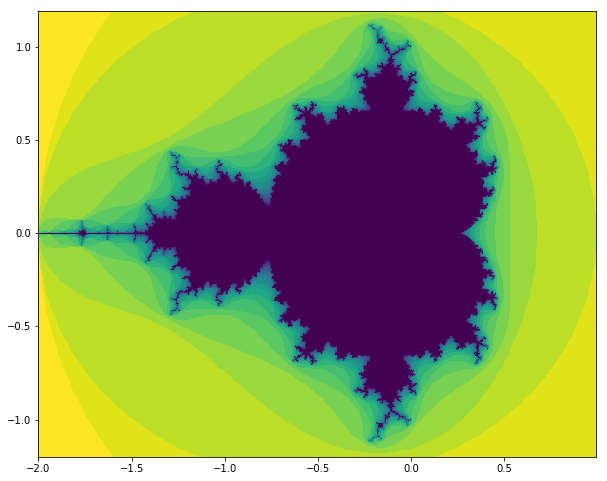

In [5]:
# Plot the result.
plt.figure(figsize = (10, 10))
plt.imshow(layer, extent = (Re[0], Re[-1], np.imag(Im[0]), np.imag(Im[-1])), 
           aspect = 'equal', origin = 'lower', cmap = 'viridis_r')